# `Import Libraries`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# `Import Dataset From sklearn`

In [12]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
type(data)

sklearn.utils._bunch.Bunch

In [14]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [16]:
X = data.data
y = data.target

# `Split the Data`

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# `Perform using LinearRegression`

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


In [22]:
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
print("Coefiicients " ,lr.coef_)
print()
print("Intercept " ,lr.intercept_)

Coefiicients  [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]

Intercept  151.34560453985995


In [30]:
y_pred = lr.predict(X_test)

In [32]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score", r2_score(y_test,y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.4526027629719197
RMSE 53.853445836765914


# `Perform Using Ridge Regression`

In [88]:
from sklearn.linear_model import Ridge
R = Ridge(alpha = 1)

In [90]:
R.fit(X_train, y_train)

Ridge(alpha=1)

In [92]:
print("R coefficient ", R.coef_)
print("R intercept ", R.intercept_)

R coefficient  [  45.36737726  -76.66608563  291.33883165  198.99581745   -0.53030959
  -28.57704987 -144.51190505  119.26006559  230.22160832  112.14983004]
R intercept  152.241675211113


In [94]:
y_pred1 = R.predict(X_test)

In [96]:
print("R2 score", r2_score(y_test,y_pred1))
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.41915292635986545
RMSE 55.47446204180109


# `Generate Data`

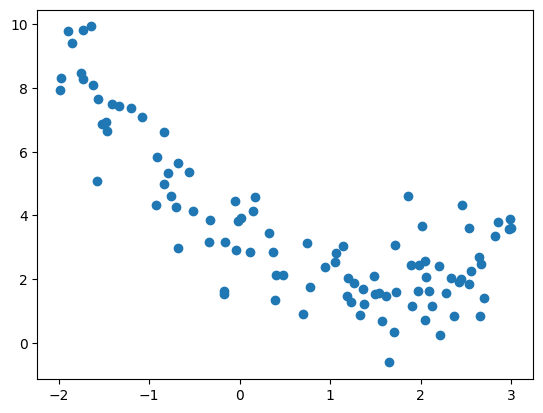

In [99]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

# `Visualization`

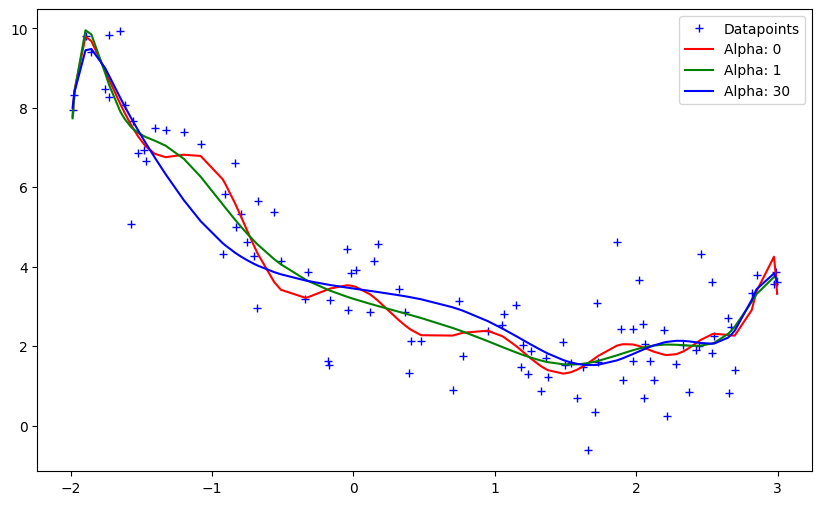

In [122]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 1, 30]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

# `Conclusion`

Alpha = 0 (red line): Here, the model follows the data points closely, likely indicating low bias but high variance (because it might not generalize well to new data) -> overfitting

Alpha = 1 (green line): This seems like the sweet spot where the model is smooth and fits the data well, suggesting low bias and relatively low variance. This might be the case you're referring to as low bias and low variance.**->** alpha = 1 (green line) seems to strike a good balance between bias and variance, with low bias and low variance.

Alpha = 30 (blue line): This has more regularization, causing the model to deviate slightly from the data points. It might have higher bias but lower variance (as it's less likely to overfit the noise).**->** Underfitting